# Módulo 10 atividade 1

Uma instituição financeira quer conhecer melhor o perfil de renda de seus novos clientes para diversos fins, por exemplo, melhor dimensionar o limite de cartões de crédito dos novos clientes, sem necessariamente solicitar olerites ou documentações que impactem na experiência do seu cliente.

Para isto, conduziu um estudo com alguns clientes, comprovando suas rendas através de olerites e outros documentos, e pretende construir um modelo preditivo para esta renda com base em algumas variáveis que já possui em seu banco de dados.

As variáveis são intuitivas - note que há uma variável 'index' que é um identificador do cliente e que em geral o ```read_csv``` do pandas coloca também uma variável sequencial.

Estes dados estão no arquivo ```previsao_de_renda.csv```. Carregue-o em um *dataframe*.

1) Avalie a estrutura de correlação das variáveis quantitativas através de um gráfico de "matriz de dispersão" e através da avaliação gráfica da matriz de correlações. Veja se você identifica algum padrão interessante ou que te faça sentido.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [47]:
previsao_renda = pd.read_csv('previsao_de_renda.csv')
previsao_renda.head()

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [48]:
previsao_renda.head(10)

,Unnamed: 0,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
5,5,2015-01-01,7409,M,False,True,0,Assalariado,Superior incompleto,Casado,Casa,46,15.561644,2.0,False,5483.58
6,6,2015-01-01,6913,F,False,True,0,Assalariado,Secundário,Casado,Casa,51,5.046575,2.0,False,1947.99
7,7,2015-01-01,13047,M,True,True,0,Empresário,Secundário,Casado,Casa,24,1.591781,2.0,False,7781.51
8,8,2015-01-01,4529,F,False,False,0,Assalariado,Secundário,Casado,Casa,53,3.430137,2.0,False,5577.82
9,9,2015-01-01,14646,F,False,True,2,Servidor público,Secundário,União,Casa,34,7.219178,4.0,False,803.34


In [49]:
interesse = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'index', 'renda']
previsao_renda[interesse]

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda
0,False,True,1,36,8682,3369.24
1,True,True,0,42,12830,6096.14
2,True,True,2,31,2885,5658.98
3,True,False,0,50,16168,7246.69
4,False,False,0,52,12438,4017.37
...,...,...,...,...,...,...
14995,True,True,1,37,3678,1193.29
14996,True,True,1,30,3405,2519.18
14997,True,True,0,40,7944,1586.85
14998,False,True,0,47,16019,6975.39


In [50]:
previsao_renda[interesse].corr()

,posse_de_veiculo,posse_de_imovel,qtd_filhos,idade,index,renda
posse_de_veiculo,1.000000,-0.014727,0.107959,-0.157837,-0.007542,0.063414
posse_de_imovel,-0.014727,1.000000,-0.002525,0.122667,-0.099683,0.029827
qtd_filhos,0.107959,-0.002525,1.000000,-0.364303,0.039734,0.009567
idade,-0.157837,0.122667,-0.364303,1.000000,-0.047971,0.042570
index,-0.007542,-0.099683,0.039734,-0.047971,1.000000,-0.001740
renda,0.063414,0.029827,0.009567,0.042570,-0.001740,1.000000


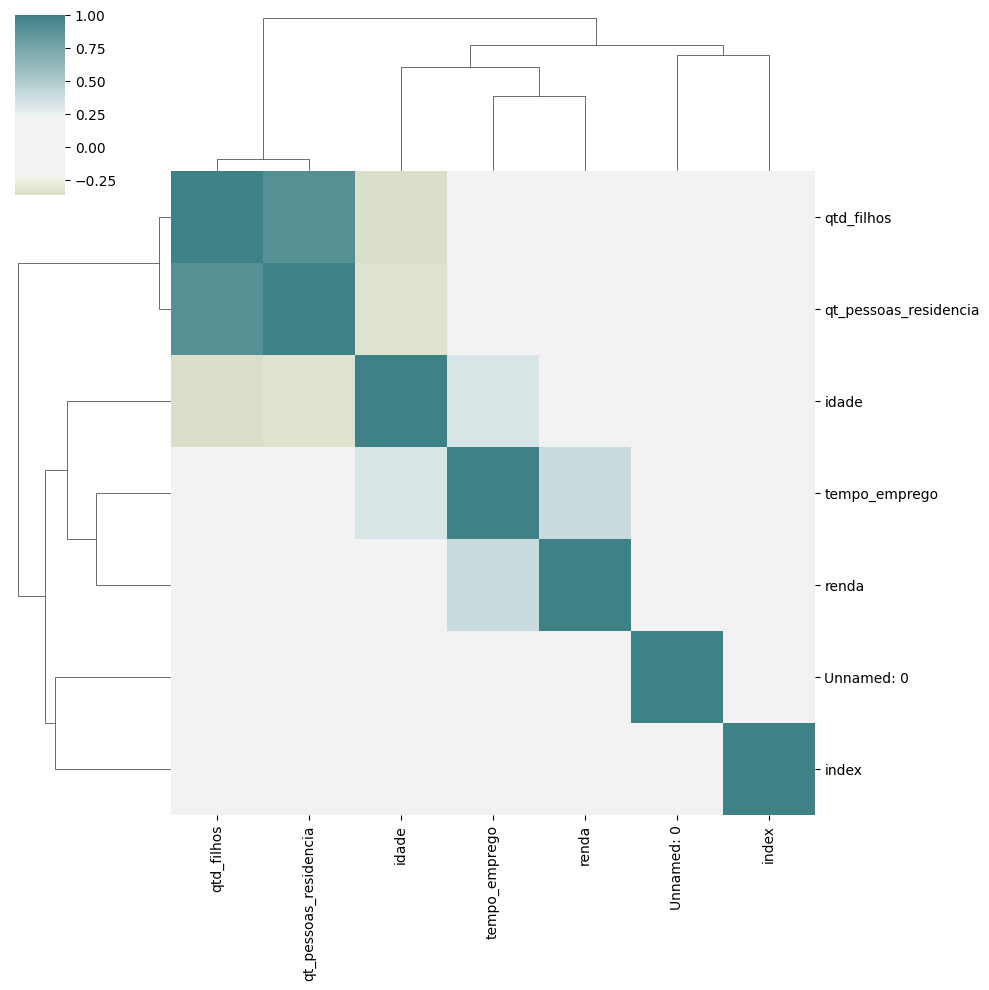

In [51]:
# Remove colunas não numéricas
previsao_renda_numeric = previsao_renda.select_dtypes(include=[np.number])

# Calcular a correlação
cmap = sns.diverging_palette(h_neg=100, h_pos=200, as_cmap=True, sep=60, center='light')
sns.clustermap(previsao_renda_numeric.corr(), figsize=(10, 10), center=0, cmap=cmap);


2) Avalie um gráfico de dispersão (*scatterplot*) específico para as duas variáveis mais correlacionadas com *renda*.

In [52]:
# Selecionar apenas colunas numéricas
previsao_renda_numeric = previsao_renda.select_dtypes(include=[np.number])

# Calcular a correlação
correlation_matrix = previsao_renda_numeric.corr()


C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


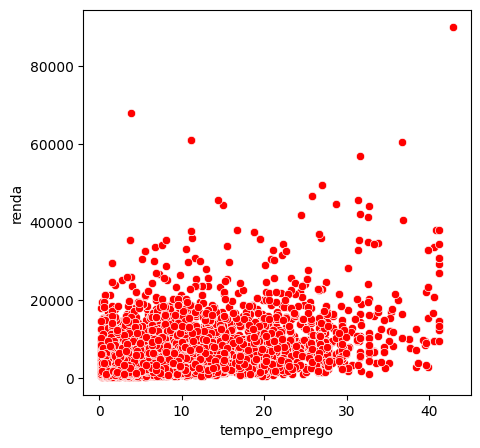

In [53]:
plt.figure(figsize=(5,5))
sns.scatterplot(x=previsao_renda['tempo_emprego'], y=previsao_renda['renda'], color='red');
plt.xlabel('tempo_emprego')
plt.ylabel('renda')
plt.show()

C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

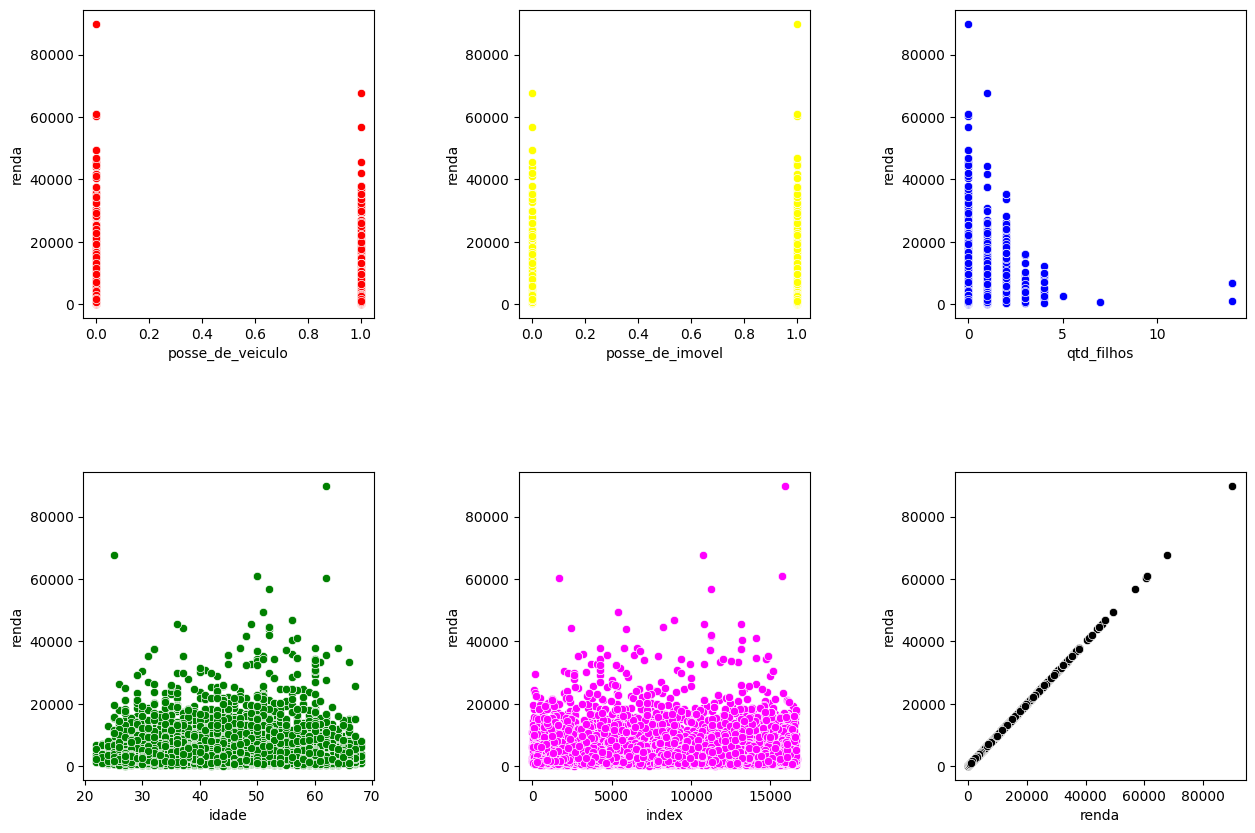

In [54]:
#previsao_renda = ['posse_de_veiculo', 'posse_de_imovel', 'qtd_filhos','idade', 'index', 'renda']
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.scatterplot(ax = axes[0, 0],x=previsao_renda['posse_de_veiculo'], y=previsao_renda['renda'], color='red');
sns.scatterplot(ax = axes[0, 1],x=previsao_renda['posse_de_imovel'], y=previsao_renda['renda'], color='yellow');
sns.scatterplot(ax = axes[0, 2],x=previsao_renda['qtd_filhos'], y=previsao_renda['renda'], color='blue');
sns.scatterplot(ax = axes[1, 0],x=previsao_renda['idade'], y=previsao_renda['renda'], color='green');
sns.scatterplot(ax = axes[1, 1],x=previsao_renda['index'], y=previsao_renda['renda'], color='magenta');
sns.scatterplot(ax = axes[1, 2],x=previsao_renda['renda'], y=previsao_renda['renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

3) Na sua aopinião, há outliers na variável renda?

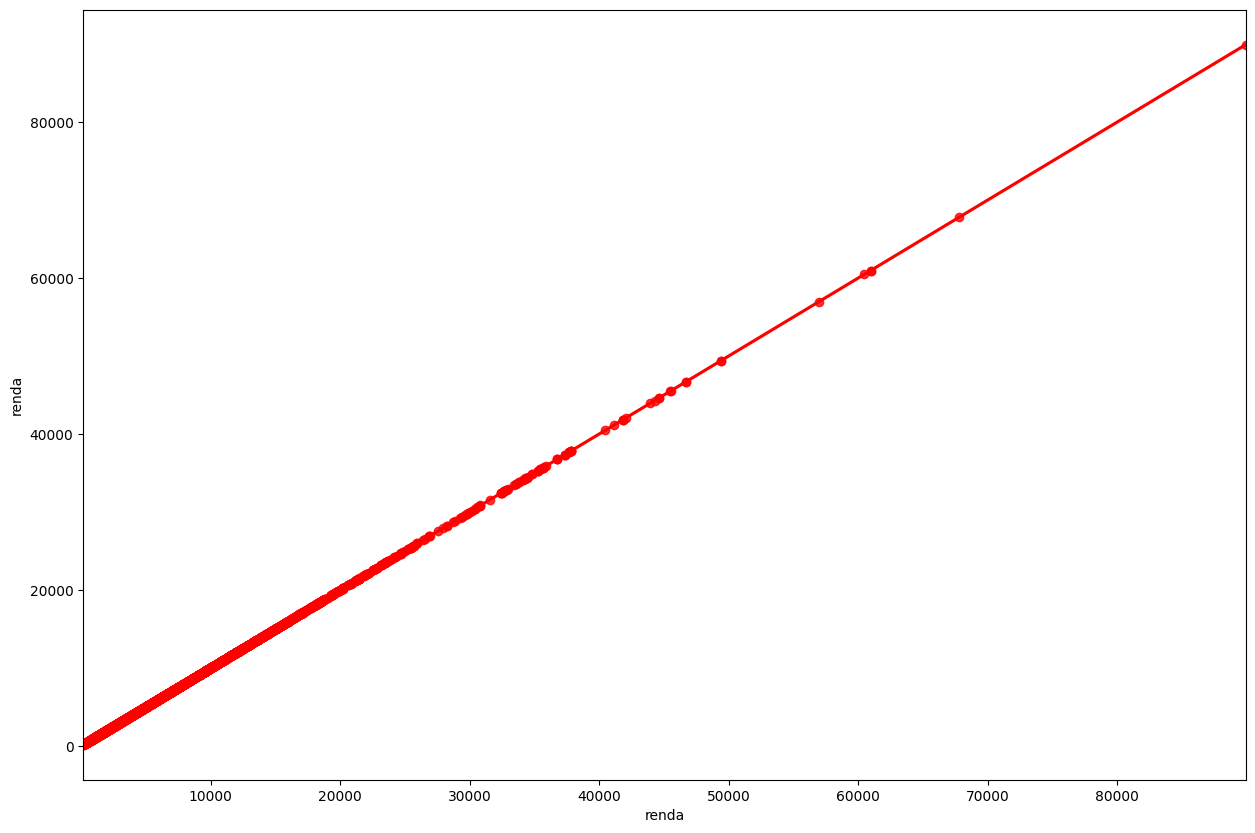

In [55]:
sns.regplot(x=previsao_renda['renda'], y=previsao_renda['renda'], color='red');

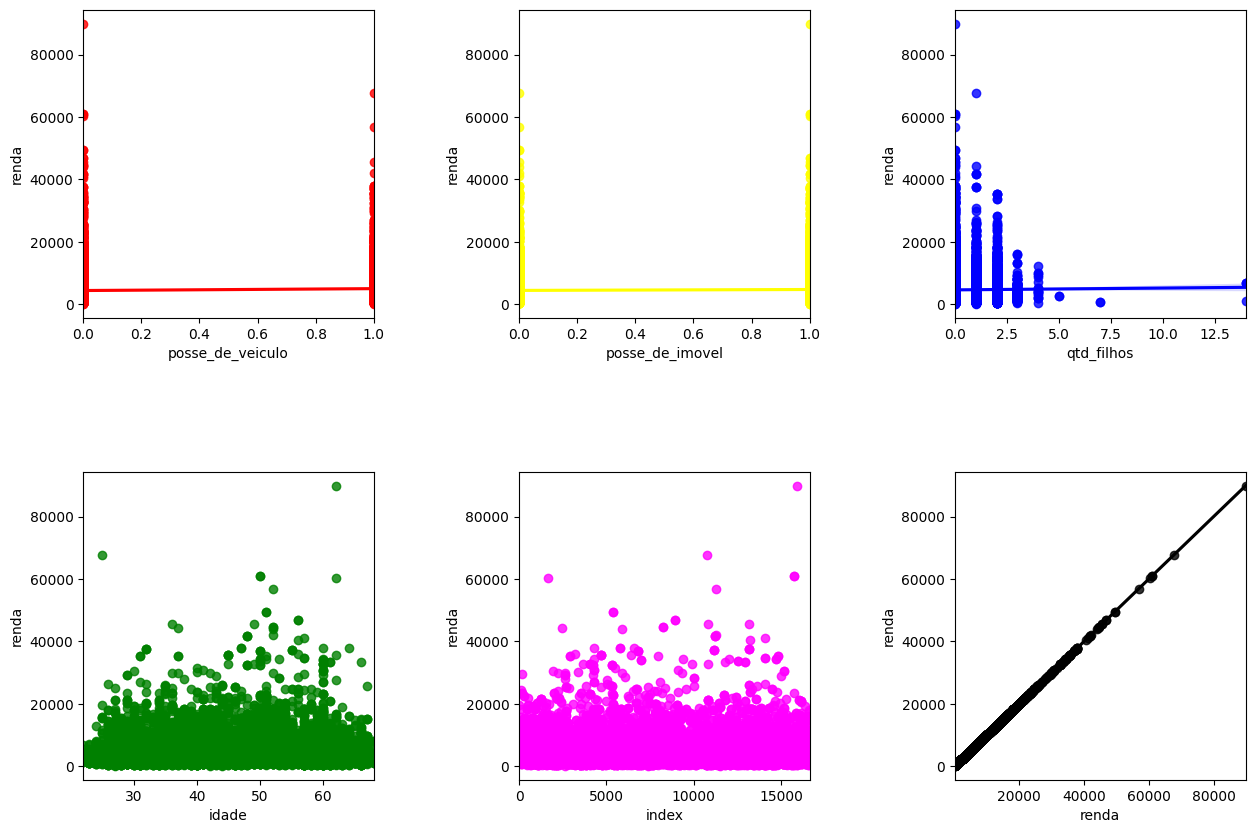

In [56]:
plt.close('all')

plt.rc('figure', figsize=(15, 10))
fig, axes = plt.subplots(2, 3)

sns.regplot(ax = axes[0, 0],x=previsao_renda['posse_de_veiculo'], y=previsao_renda['renda'], color='red');
sns.regplot(ax = axes[0, 1],x=previsao_renda['posse_de_imovel'], y=previsao_renda['renda'], color='yellow');
sns.regplot(ax = axes[0, 2],x=previsao_renda['qtd_filhos'], y=previsao_renda['renda'], color='blue');
sns.regplot(ax = axes[1, 0],x=previsao_renda['idade'], y=previsao_renda['renda'], color='green');
sns.regplot(ax = axes[1, 1],x=previsao_renda['index'], y=previsao_renda['renda'], color='magenta');
sns.regplot(ax = axes[1, 2],x=previsao_renda['renda'], y=previsao_renda['renda'], color='black');

plt.subplots_adjust(wspace=0.5, hspace=0.5)

O rendimento está alinhado, porém alguns valores estão acima da média

4) Calcule o logaritmo da variável renda e repita a sequência de análise

C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

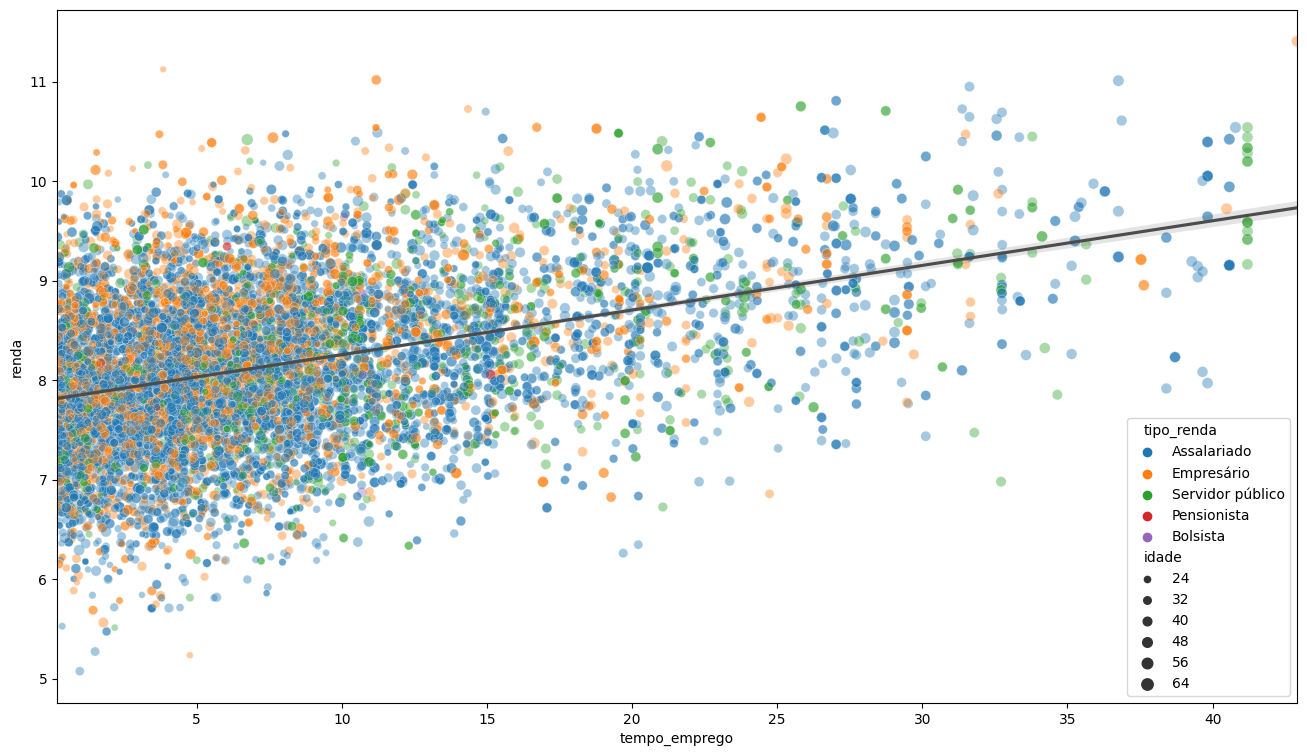

In [57]:
previsao_renda_log = previsao_renda.copy()
previsao_renda_log['renda'] = np.log(previsao_renda_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='tempo_emprego',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='idade',  # <- 2ª
                data=previsao_renda_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='tempo_emprego', 
            y='renda', 
            data=previsao_renda_log, 
            scatter=False, 
            color='.3')

plt.show()

C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\rafar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_core.py:1218: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
 

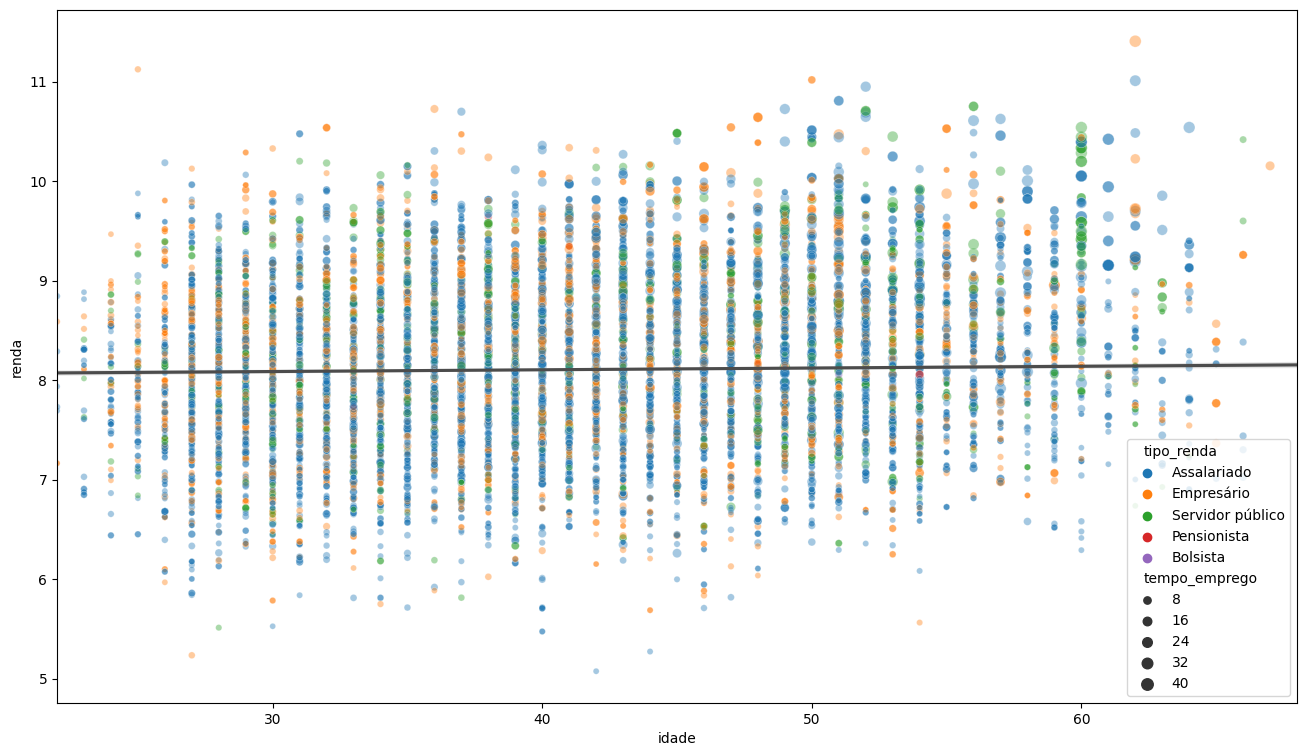

In [58]:
previsao_renda_log = previsao_renda.copy()
previsao_renda_log['renda'] = np.log(previsao_renda_log['renda'])

plt.figure(figsize=(16,9))

sns.scatterplot(x='idade',  # <- 1ª
                y='renda', 
                hue='tipo_renda', 
                size='tempo_emprego',  # <- 2ª
                data=previsao_renda_log,
                alpha=0.4)

# Linha de tendência:
sns.regplot(x='idade', 
            y='renda', 
            data=previsao_renda_log, 
            scatter=False, 
            color='.3')

plt.show()

5) A aplicação do LOG você acha que melhorou ou piorou a análise?

1) O log gerado pode auxiliar na analise de algumas ocasioes
2) O cenário gerado traz um entendimento mais simples ao gráficos
3) Cenário com maior chance de acertividade
4) pequenas complicações na leitura dos dados podem dificultar o processo
